# Homework 5: Probabilistic models

Student Name: Kuan-Lin Liu

Student ID: kll482

## 1. Logistic Regression

### 1.1 Equivalence of ERM and probabilistic approaches

(a)

$ERM = argmin_w \frac{1}{n}\sum_{i=1}^n log[1+exp(-y_iw^Tx_i)]$

$\hat{R}(w) = \frac{1}{n}\sum_{i=1}^n log[1+exp(-y_iw^Tx_i)]$

(b)

Let $$P(y=1|x;w) = f(w^Tx) = \frac{1}{1+exp(-w^Tx)}$$

We know $$\enspace P(Y=y|X=x)=f(w^Tx)^y[1-f(w^Tx)]^{(1-y)}$$

Then,

$$L(w) = \prod_{i=1}^n P(Y=y_i|X=x_i) = \prod_{i=1}^n f(w^Tx)^y[1-f(w^Tx)]^{(1-y)} $$
$$LL(w) = \log\left[ \prod_{i=1}^n f(w^Tx)^y[1-f(w^Tx)]^{(1-y)} \right] = \sum_{i=1}^n y_i\log f(w^Tx_i) + (1-y_i)\log (1-f(w^Tx_i)) $$
$$NLL(w) = -\sum_{i=1}^n y_i\log f(w^Tx_i) + (1-y_i)\log (1-f(w^Tx_i))$$

(c)

Prove (a) and (b) are equal

When $\enspace y_i=1 \enspace\text{and} \enspace \hat{y_i} = 1,$
$$NLL(w) = \sum_{i=1}^n-\log f(w^Tx_i) = \sum_{i=1}^n\log (1+exp(-w^Tx_i)) = n\hat{R(w)}$$

When $\enspace y_i=-1 \enspace\text{and} \enspace \hat{y_i} = 0,$

$$NLL(w) = \sum_{i=1}^n-\log (1-f(w^Tx_i))$$

$$= \sum_{i=1}^n \log (1-\frac{1}{1+exp(-w^Tx_i)})^{-1}$$

$$= \sum_{i=1}^n \log (\frac{exp(-w^Tx_i)}{1+exp(-w^Tx_i)})^{-1} $$

$$= \sum_{i=1}^n \log (\frac{1+exp(-w^Tx_i)}{exp(-w^Tx_i)})$$

$$= \sum_{i=1}^n \log (1+exp(w^Tx_i))$$

$$= n\hat{R(w)}$$

Since n is a constant, ERM and MLE will not be affected by the constant and will produce the same w.

### 1.2 Linearly Separable Data

#### 1.2.1

According to the condition of that the data is linearly separable, we can find a decision boundary that predict y=1 if $w^Tx \geq 0$ and y=0 if $w^Tx < 0$. The decision boundary is $w^Tx = 0$ with $P(y=1|x;w)=0.5$.

#### 1.2.2

$\frac{\partial NLL(w; c)}{\partial c} = \frac{\partial -\sum_{i=1}^n y_i\log f(cw^Tx_i) + (1-y_i)\log (1-f(cw^Tx_i))}{\partial c}$

Let $z_i = cw^Tx_i$ and $f_i=f(cw^Tx_i)$,

$\frac{\partial NLL(w; c)}{\partial c}=\frac{\partial NLL}{\partial f_i} \cdot \frac{\partial f_i}{\partial z_i} \cdot \frac{\partial z_i}{\partial c}$

$=-\sum_{i=1}^n [\frac{y_i}{f_i} - \frac{1-y}{1-f}]\cdot f_i(1-f_i) \cdot w^Tx_i$

$=-\sum_{i=1}^n[(1-f_i)y_i-f_i(1-y_i)] \cdot w^Tx_i$

$=-\sum_{i=1}^n [y_i-f_i] \cdot w^Tx_i$

$=\sum_{i=1}^n [f_i-y_i] \cdot w^Tx_i$

$=\sum_{i=1}^n [f_i(cw^Tx)-y_i] \cdot w^Tx_i$

$\because \text{If} \ c \rightarrow \infty, \ f(cw^Tx_i) \rightarrow 1$

$\therefore$ the derivative of NLL on c is strictly positive

### 1.3 Regularized Logistic Regression

#### 1.3.1

First, let's prove $\sum_{i=1}^n log(1+exp(y_iw^Tx_i)$ is convex.


Since we know $\sum_{i=1}^n \lambda ||w||^2$ is also convex, so $J_{logistic} (w)$ is also convex.

#### 1.3.2

In [6]:
import numpy as np
from scipy.optimize import minimize

In [63]:
def f_objective(theta, X, y, l2_param=1):
    '''
    Args:
        theta: 1D numpy array of size num_features
        X: 2D numpy array of size (num_instances, num_features)
        y: 1D numpy array of size num_instances
        l2_param: regularization parameter

    Returns:
        objective: scalar value of objective function
    '''
    # y should be in {-1, 1}
    n = X.shape[0]
    x1 = 0 # exp(0) = 1
    x2 = np.array([-y[i]*v for i, v in enumerate(np.dot(X, theta))])
    return np.sum(np.logaddexp(x1, x2))/n + l2_param*np.sum(np.square(theta))

In [126]:
def f_objective(theta, X, y, l2_param=1):
    n = X.shape[0]
    summ = 0
    for i in range(n):
        summ += np.logaddexp(0, -y[i]*np.dot(theta, X[i]))
    return summ/n + l2_param*sum(theta**2)

#### 1.3.3

In [164]:
def fit_logistic_reg(X, y, objective_function, l2_param=1):
    '''
    Args:
        X: 2D numpy array of size (num_instances, num_features)
        y: 1D numpy array of size num_instances
        objective_function: function returning the value of the objective
        l2_param: regularization parameter
        
    Returns:
        optimal_theta: 1D numpy array of size num_features
    '''
    theta_0 = np.zeros(X.shape[1])
    minimizer = minimize(objective_function, theta_0, args=(X, y, l2_param))
    
    # return the optimal theta
    return minimizer.x

> Remember to do preprocessing and add the bias vector in the following question.

#### 1.3.4

In [128]:
### function for reading the txt file ###
def read_txt(file_path):
    data = []
    with open(file_path, "r") as f:
        for row in f:
            row_float = [float(i) for i in row.strip().split(",")]
            data.append(row_float)
    return np.array(data)

In [148]:
### input X_train, X_val, y_train, y_val ###
relative_path = "code/logistic-code/"
X_train = read_txt(relative_path+"X_train.txt")
X_val = read_txt(relative_path+"X_val.txt")
y_train = read_txt(relative_path+"y_train.txt")
y_val = read_txt(relative_path+"y_val.txt")

### revise the domain of y_train and y_val to be in {-1, 1} ###
y_train = y_train.reshape(y_train.shape[0])
y_train = [1 if row > 0.5 else -1 for row in y_train]

y_val = y_val.reshape(y_val.shape[0])
y_val = [1 if row > 0.5 else -1 for row in y_val]

In [149]:
### add bias ###
bias_train = np.ones((X_train.shape[0], 1))
bias_val = np.ones((X_val.shape[0], 1))
X_train = np.hstack((X_train, bias_train))
X_val = np.hstack((X_val, bias_val))

In [150]:
### standardize ###
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train)
X_val_scaled = std_scaler.fit_transform(X_val)

In [151]:
### fit ###
weight = fit_logistic_reg(X_train_scaled, y_train, f_objective)

In [152]:
weight

array([ 9.55816228e-04, -2.98337651e-04,  3.02827133e-03,  1.05326768e-01,
       -3.58817577e-03, -1.35868486e-03, -3.85249746e-03, -7.90075397e-04,
       -1.14383982e-03, -7.17818640e-02,  6.54805982e-03, -4.51114274e-03,
        1.12493000e-02, -3.86482133e-03, -2.71206254e-03,  1.50358193e-03,
       -2.78418333e-03, -9.19055703e-03, -6.82303734e-03, -1.02758348e-02,
       -9.05911182e-09])

> From the question 1.1 above, we have proved $NLL(w)$ is equal to $\hat{nR(w)}$. Therefore, $LL(w)$ is equal to $-\hat{nR(w)}$. Just for reminding, $\hat{R(w)}$ is my objective function without the regularizer.

In [162]:
### get loglikelilood ###
def get_logll_function(X, y, theta, l2_param):
    my_objective = f_objective(theta, X, y, l2_param)
    n = X.shape[0]
    
    return -n*(my_objective-l2_param*np.sum(theta**2))

In [163]:
### function for plotting the LL for a list of regularization parameter ###
import matplotlib.pyplot as plt

def plot_logll(l2_param_list, logll_list):
    plt.plot(l2_param_list, logll_list, marker="o")
    plt.xlabel("l2 param")
    plt.ylabel("log likelihood")
    plt.title("The curve of log likelihood")
    plt.show()

In [165]:
### find the minimal LL ###
def train_logistic_reg(X_train, y_train, X_val, y_val, objective_function, l2_param_list):
    logll_list = []
    for l2 in l2_param_list:
        best_theta = fit_logistic_reg(X_train, y_train, objective_function, l2) 
        logll_list.append(get_logll_function(X_val, y_val, best_theta, l2))
    
    # return the logll list
    return logll_list

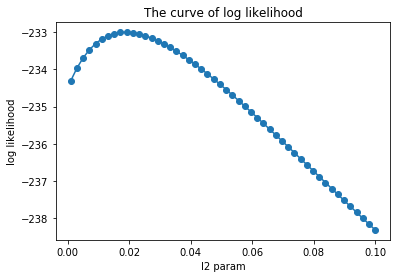

In [166]:
### plot the result ###
l2_param_list = np.linspace(0.001, 0.1, 50)
logll_list_result = train_logistic_reg(X_train_scaled, y_train, X_val_scaled, y_val, f_objective, l2_param_list)
plot_logll(l2_param_list, logll_list_result)

In [167]:
### Get maximal log-likelihood from the plot ###
max_logll_l2 = max(zip(l2_param_list, logll_list_result), key=lambda x: x[1])
print("The minimal log-likelihood I found is: {}".format(max_logll_l2[1]))
print("The value of the l2 parameter is: {}".format(max_logll_l2[0]))

The minimal log-likelihood I found is: -233.00235581647405
The value of the l2 parameter is: 0.019183673469387756


## 2. Bayesian Logistic Regression with Gaussian Priors

### 2.1

$P(w|\mathcal{D}) = \frac{P(w\cap\mathcal{D})}{P(\mathcal{D}}=\frac{P(w)\cdot P(\mathcal{D}|w)}{P(\mathcal{D})} $

$\propto P(w)\cdot P(\mathcal{D}|w)$

$\propto P(w)\cdot L(w)$

$\propto P(w)\cdot exp(LL(w))$ 

$ \propto P(w)\cdot exp(-NLL(w))$

### 2.2

$ L(w) = \prod_{i=1}^n P(Y=y_i|X=x_i) = \prod_{i=1}^n f(w^Tx)^y[1-f(w^Tx)]^{(1-y)} $

From the equation above, we know the likelihood of logistic regression is a Bernoulli distribution, which is the beta family. However, $w$ has a normal distribution. Therefore, $P(w)$ is not a conjugate prior to the likelihood of logistic regression.

### 2.3

Given, $$\mathcal{N}(0, \Sigma)=\frac{1}{\sqrt{2\pi\sigma^2}}exp(-\frac{w^Tw}{2\Sigma})$$

Solving,

$$-\log P(w|\mathcal{D}) \propto -\log[P(w)\cdot exp(-NLL(w))]$$

$$\propto -\log P(w) + NLL(w), \enspace \text{given} \ w \sim \mathcal{N}(0, \Sigma)$$

$$\propto -[\log (2\pi\Sigma)^{-\frac{1}{2}} - \frac{1}{2}w^Tw\Sigma^{-1}] + n\hat{R(w)}$$

$$\propto \frac{1}{2}log (2\pi\Sigma) + \frac{1}{2}w^Tw\Sigma^{-1} + n\hat{R(w)}$$

$$\propto \frac{1}{2}w^Tw\Sigma^{-1} + n\hat{R(w)} \enspace \because \frac{1}{2}log (2\pi\Sigma) \enspace \text{is constant} $$

Let, $$\Sigma = \frac{1}{2n\lambda}I$$

Then we can get, $$-\log P(w|\mathcal{D}) \propto n\hat{R(w)} + n\lambda ||w||^2$$

### 2.4

Continuing from Q2.3, if $\Sigma=I$, then we set $\lambda=\frac{1}{2n}$ so that the minimizer is equal to the mode of the posterior distribution of w.

## 3. Coin Flipping with Partial Observability

### 3.1

$P(x=H|\theta_1, \theta_2) = \Sigma_{\acute{z} \in \{H, T\}}P(x=H, z=\acute{z} \ |\theta_1\theta_2)$

Solve,

$P(x=H, z=\acute{z} \ |\theta_1\theta_2)$

$= \frac{P(x=H, z=\acute{z},\theta_1\theta_2)}{P(\theta_1\theta_2)}$

$=\frac{P(x=H | z=\acute{z}, \  \theta_1\theta_2) \cdot P(z=\acute{z},\ \theta_1\theta_2)}{P(\theta_1 \theta_2)}$

$=P(x=H | z=\acute{z}, \  \theta_2) \cdot P(z=\acute{z}\ | \theta_1\theta_2) \enspace \because \theta_1 \ \text{is independent to} \ x \ \text{given by} \ z, \ \theta_2$

$=P(x=H | z=\acute{z}, \  \theta_2) \cdot P(z=\acute{z}\ | \theta_1) \enspace \because \theta_2 \ \text{is independent to z given by } \theta_1$

Since $P(x=T|z=T)=1$, we only care about the condition of $\acute{z}=H$.

Therefore, $$P(x=H|\theta_1, \theta_2)=P(x=H|z=H, \theta_2)\cdot P(z=H|\theta_1)=\theta_1\theta_2$$

### 3.2

$P(x|\theta_1, \theta_2)=P(x=H|\theta_1, \theta_2) \cdot P(x=T|\theta_1, \theta_2)$

$P(\mathcal{D_r}|\theta_1, \theta_2)=(\frac{N_r}{n_h+n_t})(\theta_1\theta_2)^{n_h}(1-\theta_1\theta_2)^{n_t}$

$-\log P(\mathcal{D_r}|\theta_1, \theta_2) \propto -n_h \log \theta_1\theta_2 - n_t \log (1-\theta_1\theta_2)$

By MLE, we want to minimize $-\log P(\mathcal{D}|\theta_1, \theta_2)$

(a) 

$\frac{\partial -\log P(\mathcal{D}|\theta_1, \theta_2)}{\partial \theta_1}=\frac{-n_h}{\theta_1}+\frac{n_t\theta_2}{1-\theta_1\theta_2}=0$

(b)

$\frac{\partial -\log P(\mathcal{D}|\theta_1, \theta_2)}{\partial \theta_2}=\frac{-n_h}{\theta_2}+\frac{n_t\theta_1}{1-\theta_1\theta_2}=0$

$\Rightarrow \frac{n_t\theta_1\theta_2}{n_h}=1-\theta_1\theta_2$ 

Substitute $\frac{n_t\theta_1\theta_2}{n_h}$ with $1-\theta_1\theta_2$ in (a), we will get $\frac{-n_h}{\theta_1}+\frac{n_hn_t}{n_t\theta_1}=0$.

So, $\theta_1, \theta_2$ can not be estimated using MLE.

### 3.3

$P(\mathcal{D_r, D_c}|\theta_1, \theta_2)=P(D_c|\theta_1)P(D_r|\theta_1, \theta_2)$

$-\log P(\mathcal{D_r, D_c}|\theta_1, \theta_2) = -\log P(D_c|\theta_1)P(D_r|\theta_1, \theta_2)$

$\propto \big[-c_h \log \theta_1 - c_t \log (1-\theta_1)\big]+ \big[-n_h \log \theta_1\theta_2 - n_t \log (1-\theta_1\theta_2)\big]$

By MLE, we want to minimize $\propto \big[-c_h \log \theta_1 - c_t \log (1-\theta_1)\big]+ \big[-n_h \log \theta_1\theta_2 - n_t \log (1-\theta_1\theta_2)\big]$

(a)

$\frac{\partial -\log P(\mathcal{D_r, D_c}|\theta_1, \theta_2)}{\partial \theta_1}=-\big[\frac{c_h}{\theta_1}-\frac{c_t}{1-\theta_1} \big]-\big[\frac{n_h}{\theta_1}-\frac{\theta_2n_t}{1-\theta_1\theta_2} \big]=0$

(b)

$\frac{\partial -\log P(\mathcal{D_r, D_c}|\theta_1, \theta_2)}{\partial \theta_2}=-\big[\frac{n_h}{\theta_2}-\frac{n_t\theta_1}{1-\theta_1\theta_2}\big]=0$

$\Rightarrow 1-\theta_1\theta_2=\frac{n_t\theta_1\theta_2}{n_h}$

Substitute $1-\theta_1\theta_2$ with $\frac{n_t\theta_1\theta_2}{n_h}$ in (a), we will get

$\theta_1=\frac{c_h}{c_h+c_t}$

$\theta_2=\frac{n_h}{(n_h+n_t)\theta_1}=\frac{n_h(c_h+c_t)}{(n_h+n_t)c_h}$

### 3.4

Given $g(\theta_1)=\theta_1^{h-1}(1-\theta_1)^{t-1}$

$\theta_{1, MAP}=argmax_{\theta_1}g(\theta_1)L(\theta_1, \theta_2)$

Let $\acute{L}(\theta_1, \theta_2)=g(\theta_1)L(\theta_1, \theta_2)$

$\acute{LL}(\theta_1, \theta_2)=\big[(h-1)\log \theta_1+(t-1) \log (1-\theta_1) \big]+ \big[c_h\log \theta_1+c_t \log(1-\theta_1) \big]+ \big[n_n \log (\theta_1, \theta_2)+n_t \log(1-\theta_1, \theta_2)\big]$

(a)

$\frac{\partial \acute{NLL}}{\partial \theta_1}=-\big[\frac{h-1}{\theta_1}-\frac{t-1}{1-\theta_1} \big]-\big[\frac{n_h}{\theta_1}-\frac{\theta_2n_t}{1-\theta_1\theta_2} \big]-\big[\frac{c_h}{\theta_1}-\frac{c_t}{1-\theta_1} \big]=0$

(b)

$\frac{\partial \acute{NLL}}{\partial \theta_2}=\frac{n_h}{\theta_2}-\frac{\theta_1n_t}{1-\theta_1\theta_2}=0$

$\Rightarrow \frac{n_h}{\theta_1n_t}=\frac{\theta_2}{1-\theta_1\theta_2}$

From (a) and (b), we can obtain

$\theta_1=\frac{c_h+h-1}{c_h+c_t+h+t-2}$

$\theta_2=\frac{n_h}{(n_h+n_t)\theta_1}=\frac{n_h(c_h+c_t+h+t-2)}{(n_h+n_t)(c_h+h-1)}$
